**<h3>Exploratory Data Analysis</h3>**
Notebook to perform exploratory data analysis 
(EDA) on the workouts fetched from the 
HEVY API.

In [90]:
# Change the CWD to the current working directory of the project
import os
os.chdir("/Users/daniel/Downloads/workout-tracker")

In [91]:
# Import necessary libraries
import pandas as pd
import numpy as np
 # Auto reload for iterative development
%load_ext autoreload
%autoreload 2
from pipeline import get_all_workouts

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
df = get_all_workouts()

df.head(10)

,workout_id,workout_title,start_time,end_time,exercise_title,exercise_notes,set_index,set_weight_lbs,set_reps
0,77da42b5-874f-4473-b8e2-ae6b82092efc,Push,2025-08-19T20:28:37+00:00,2025-08-19T21:18:25+00:00,JM Press (Barbell),,0,125.02,8
1,77da42b5-874f-4473-b8e2-ae6b82092efc,Push,2025-08-19T20:28:37+00:00,2025-08-19T21:18:25+00:00,JM Press (Barbell),,1,125.02,7
2,77da42b5-874f-4473-b8e2-ae6b82092efc,Push,2025-08-19T20:28:37+00:00,2025-08-19T21:18:25+00:00,Overhead Press (Smith Machine),,0,135.02,8
3,77da42b5-874f-4473-b8e2-ae6b82092efc,Push,2025-08-19T20:28:37+00:00,2025-08-19T21:18:25+00:00,Overhead Press (Smith Machine),,1,135.02,8
4,77da42b5-874f-4473-b8e2-ae6b82092efc,Push,2025-08-19T20:28:37+00:00,2025-08-19T21:18:25+00:00,Single Arm Triceps Pushdown (Cable),,0,25.00,9
5,77da42b5-874f-4473-b8e2-ae6b82092efc,Push,2025-08-19T20:28:37+00:00,2025-08-19T21:18:25+00:00,Single Arm Triceps Pushdown (Cable),,1,25.00,8
6,77da42b5-874f-4473-b8e2-ae6b82092efc,Push,2025-08-19T20:28:37+00:00,2025-08-19T21:18:25+00:00,Chest Press (Machine),chest tired,0,145.02,5
7,77da42b5-874f-4473-b8e2-ae6b82092efc,Push,2025-08-19T20:28:37+00:00,2025-08-19T21:18:25+00:00,Chest Press (Machine),chest tired,1,125.02,7
8,77da42b5-874f-4473-b8e2-ae6b82092efc,Push,2025-08-19T20:28:37+00:00,2025-08-19T21:18:25+00:00,Chest Fly (Machine),,0,200.03,8
9,77da42b5-874f-4473-b8e2-ae6b82092efc,Push,2025-08-19T20:28:37+00:00,2025-08-19T21:18:25+00:00,Chest Fly (Machine),,1,200.03,8


In [93]:
df.describe()

,set_index,set_weight_lbs,set_reps
count,1558.000000,1511.000000,1558.000000
mean,0.546855,130.540821,7.260591
std,0.607214,66.059512,2.508841
min,0.000000,0.000000,3.000000
25%,0.000000,75.010000,6.000000
50%,0.000000,130.020000,7.000000
75%,1.000000,180.030000,8.000000
max,3.000000,335.060000,71.000000


In [94]:
df.dtypes

workout_id         object
workout_title      object
start_time         object
end_time           object
exercise_title     object
exercise_notes     object
set_index           int64
set_weight_lbs    float64
set_reps            int64
dtype: object

<h4>Examining Missing Data</h4>

In [95]:
# Calculate % of nulls
all_null = (df.isnull().sum() / len(df)) * 100
all_null = all_null[all_null > 0].sort_values(ascending=False)
all_null = all_null.to_frame(name='Percentage of Nulls')
all_null

,Percentage of Nulls
set_weight_lbs,3.016688


As we can see, only set_weight_lbs contains null values. We can impute these nulls values with the mean of the exercise type.

In [96]:
# Calculate the mean weight lifted for each exercise
mean_weight_by_exercise = df.groupby('exercise_title')['set_weight_lbs'].mean()
mean_weight_by_exercise.to_frame(name='Mean Weight (lbs)').sort_values(by='Mean Weight (lbs)', ascending=False)

,Mean Weight (lbs)
exercise_title,
Leg Press Horizontal (Machine),335.060000
Romanian Deadlift (Barbell),288.382381
Lat Pulldown (Machine),270.050000
Leg Press (Machine),249.434545
Deadlift (Smith Machine),237.230000
...,...
Rear Delt Reverse Fly (Cable),13.892857
Hanging Leg Raise,0.000000
Bench Dip,NaN


In [97]:
# Fill missing values in set_weight_lbs with the mean weight for each exercise
df['set_weight_lbs'] = df['set_weight_lbs'].fillna(df['exercise_title'].map(mean_weight_by_exercise))

In [98]:
# Check nulls again
(df.isnull().sum() / len(df) * 100).to_frame(name='Percentage of Nulls')

,Percentage of Nulls
workout_id,0.000000
workout_title,0.000000
start_time,0.000000
end_time,0.000000
exercise_title,0.000000
exercise_notes,0.000000
set_index,0.000000
set_weight_lbs,1.797176
set_reps,0.000000


We still have some NULL values after imputing, so we can safely just drop these rows. Dropping <2% of rows shouldn't impact analysis.

In [99]:
df = df.dropna(subset=['set_weight_lbs'])

In [100]:
# Check nulls again
(df.isnull().sum() / len(df) * 100).to_frame(name='Percentage of Nulls')

,Percentage of Nulls
workout_id,0.0
workout_title,0.0
start_time,0.0
end_time,0.0
exercise_title,0.0
exercise_notes,0.0
set_index,0.0
set_weight_lbs,0.0
set_reps,0.0


<h4>Data Exploration</h4>

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
sns.set_context("notebook")

# Convert start and end times to datetime
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce')
df['workout_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

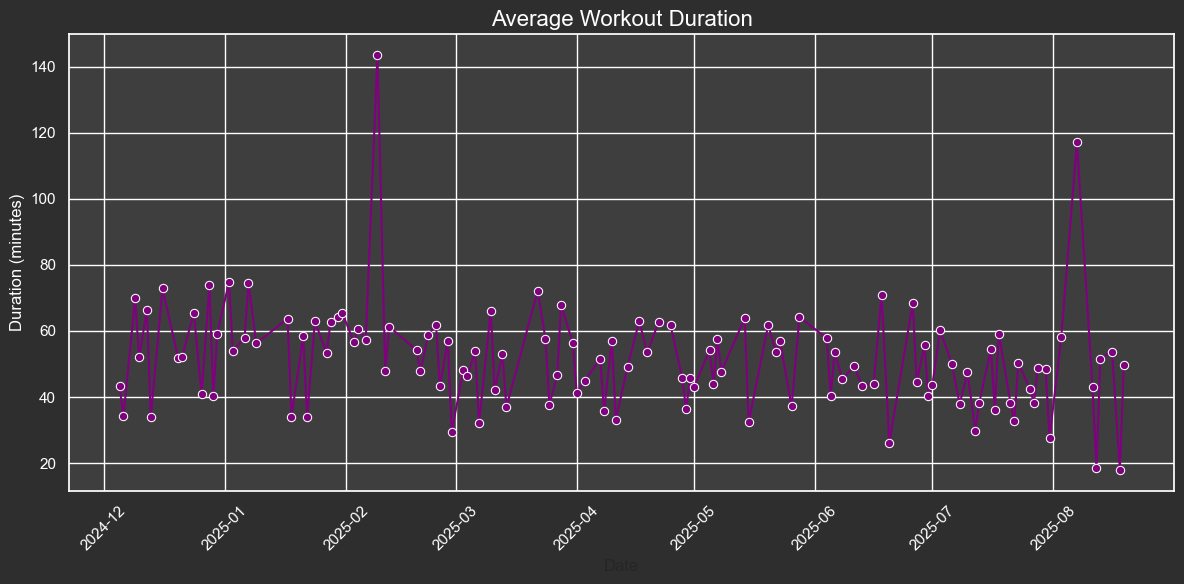

In [102]:
# Calculate the daily average workout duration
daily_avg = df.groupby(df['start_time'].dt.date)['workout_duration'].mean().reset_index()
# Plot
plt.figure(figsize=(12,6), facecolor="#2E2E2E")
ax = sns.lineplot(x='start_time', y='workout_duration', data=daily_avg, marker='o', color='purple')
ax.set_facecolor("#3E3E3E")
plt.title("Average Workout Duration", fontsize=16, color='white')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Duration (minutes)", fontsize=12, color='white')
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.tight_layout()
plt.show()

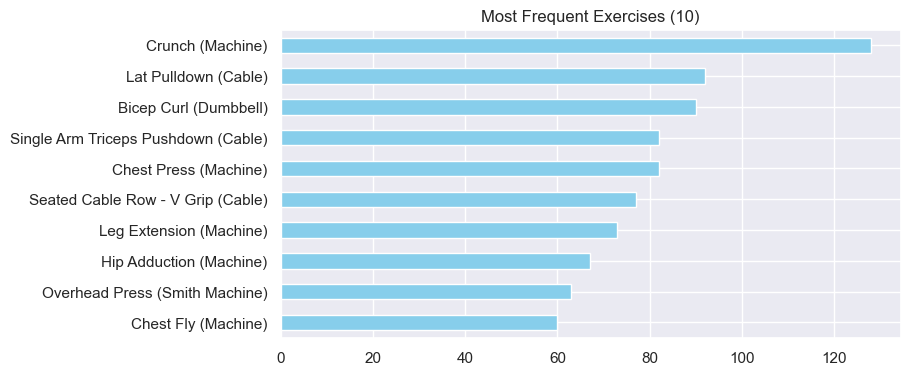

In [103]:
# Most frequent exercises
df['exercise_title'].value_counts().head(10).plot(
    kind='barh', 
    figsize=(8,4),
    title='Most Frequent Exercises (10)', 
    color='skyblue',
).invert_yaxis()

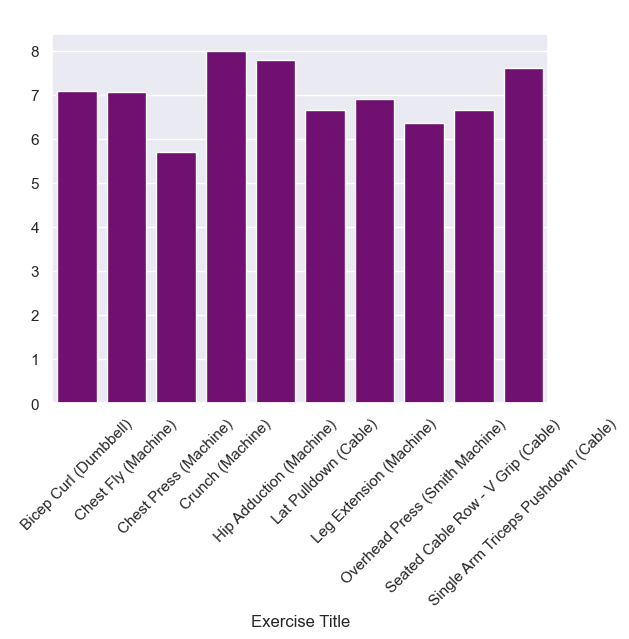

In [104]:
# Top Exercises and their average sets
top_exercises = df['exercise_title'].value_counts().head(10).index
df_top = df[df['exercise_title'].isin(top_exercises)]
df_top_avg = df_top.groupby('exercise_title')['set_reps'].mean().reset_index()

sns.barplot(x='exercise_title', y='set_reps', data=df_top_avg, color='purple')
plt.title("Average Reps by Most Frequent Exercise", fontsize=16, color='white')
plt.xlabel("Exercise Title", fontsize=12)
plt.ylabel("Average Reps", fontsize=12, color='white')
plt.xticks(rotation=45)
plt.show()


In [105]:
# Calculate average volume by workout type
df['volume'] = df['set_weight_lbs'] * df['set_reps']
df.groupby('workout_title')['volume'].mean().sort_values(ascending=False).to_frame(name='Average Volume (lbs)')

,Average Volume (lbs)
workout_title,
Lower B,1196.499519
Lower A,1191.449286
Lower,1170.753333
pull,912.672500
Push,829.042381
Upper A,788.828679
Pull,780.097966
Upper B,767.093709
quic leg (KC),759.476250


In [106]:
# We don't want to keep volume.
df = df.drop(columns=['volume'])

In [107]:
# I noticed that I have a variety of names in workout_title, I am going to change these for consistency
def create_workout_type(title):
    title = title.lower()
    if 'lower' in title or 'leg' in title:
        return 'Lower'
    elif 'upper' in title:
        return 'Upper'
    elif 'pull' in title:
        return 'Pull'
    elif 'push' in title:
        return 'Push'
    elif 'full' in title:
        return 'Full Body'
    else:
        return 'Other'

df['workout_type'] = df['workout_title'].apply(create_workout_type)

In [108]:
# Replace workout title with standardized workout type
df['workout_title'] = df['workout_type']
df.drop(columns=['workout_type'], inplace=True)
# Rename it for clarity
df.rename(columns={'workout_title': 'workout_type'}, inplace=True)
df['workout_type'].value_counts().to_frame("Workout Type")

,Workout Type
Upper,803
Lower,438
Push,126
Pull,126
Other,37
